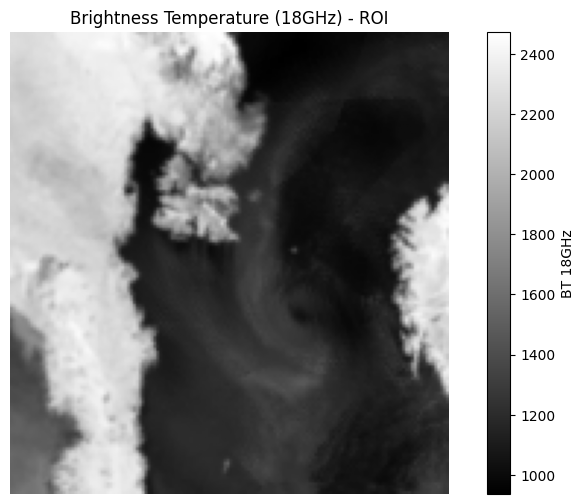

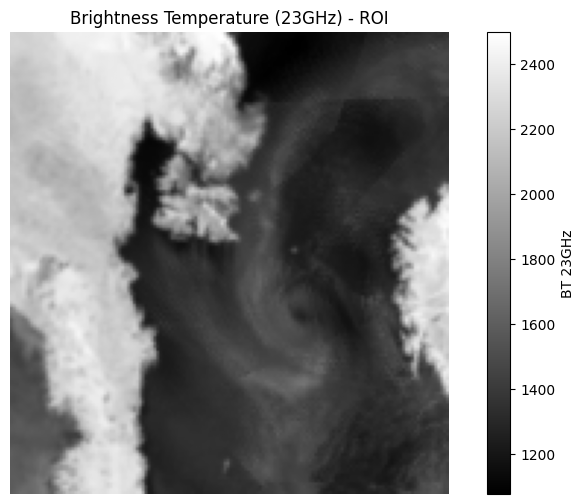

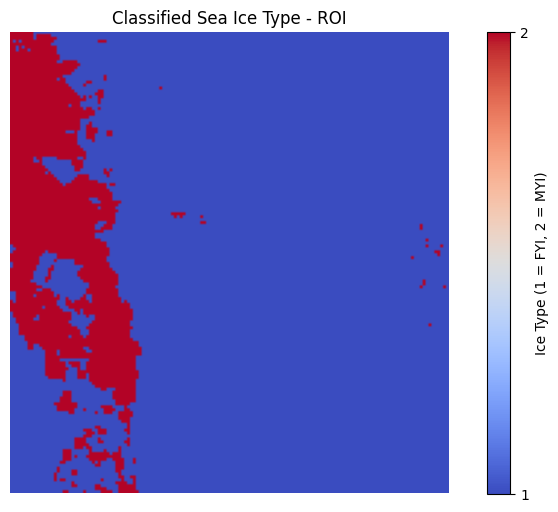

In [77]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Define coordinate bounds
lat_min, lat_max = 70.0, 85.0  # Near the North Pole
lon_min, lon_max = -10.0, 50.0  # Across the Arctic Ocean


file_path = '/content/DATA_3.he5'

with h5py.File(file_path, 'r') as f:
    grid_path = "HDFEOS/GRIDS/NpPolarGrid12km"
    lat = f[f"{grid_path}/lat"][:]
    lon = f[f"{grid_path}/lon"][:]
    bt_18 = f[f"{grid_path}/Data Fields/SI_12km_NH_18H_ASC"][:]
    bt_23 = f[f"{grid_path}/Data Fields/SI_12km_NH_23H_ASC"][:]

    # Get mask for desired region
    mask = (lat >= lat_min) & (lat <= lat_max) & (lon >= lon_min) & (lon <= lon_max)

    if not np.any(mask):
        raise ValueError("No data points fall within the specified region!")

    # Find bounding box of mask
    rows, cols = np.where(mask)
    row_min, row_max = rows.min(), rows.max()
    col_min, col_max = cols.min(), cols.max()

    # Crop arrays
    bt_18_crop = bt_18[row_min:row_max+1, col_min:col_max+1]
    bt_23_crop = bt_23[row_min:row_max+1, col_min:col_max+1]
    lat_crop = lat[row_min:row_max+1, col_min:col_max+1]
    lon_crop = lon[row_min:row_max+1, col_min:col_max+1]

    # Compute EVD and classify ice type
    evd = bt_18_crop - bt_23_crop
    ice_type = np.where(evd > 0, 2, 1)

# Plot BT (18GHz) as grayscale
plt.figure(figsize=(10, 6))
plt.imshow(bt_18_crop, cmap='gray')
plt.colorbar(label='BT 18GHz')
plt.title('Brightness Temperature (18GHz) - ROI')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(bt_23_crop, cmap='gray')
plt.colorbar(label='BT 23GHz')
plt.title('Brightness Temperature (23GHz) - ROI')
plt.axis('off')
plt.show()


# Plot Ice Type
plt.figure(figsize=(10, 6))
plt.imshow(ice_type, cmap='coolwarm', vmin=1, vmax=2)
plt.colorbar(ticks=[1, 2], label='Ice Type (1 = FYI, 2 = MYI)')
plt.title('Classified Sea Ice Type - ROI')
plt.axis('off')
plt.show()


In [75]:
fyi_count = np.sum(ice_type == 1)
myi_count = np.sum(ice_type == 2)
total = fyi_count + myi_count

print(f"First-Year Ice (FYI): {fyi_count} pixels ({(fyi_count/total)*100:.2f}%)")
print(f"Multi-Year Ice (MYI): {myi_count} pixels ({(myi_count/total)*100:.2f}%)")

First-Year Ice (FYI): 20190 pixels (85.19%)
Multi-Year Ice (MYI): 3510 pixels (14.81%)


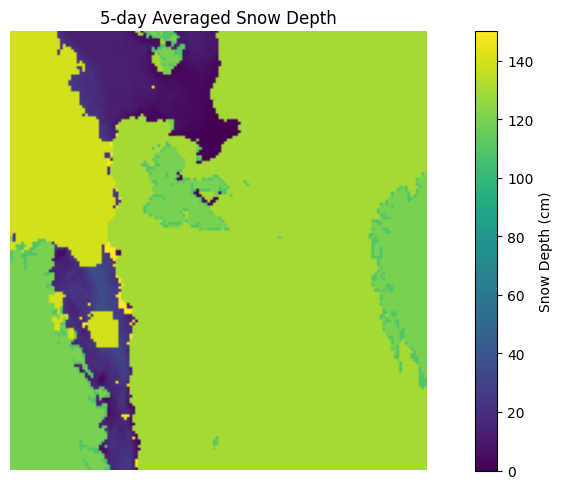

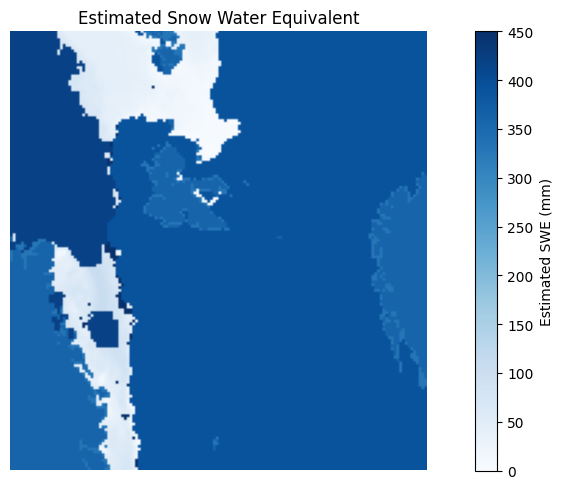

In [76]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = '/content/DATA_3.he5'

# Arctic region of interest
lat_min, lat_max = 70.0, 85.0
lon_min, lon_max = -10.0, 50.0

with h5py.File(file_path, 'r') as f:
    grid_path = "HDFEOS/GRIDS/NpPolarGrid12km"

    # Load variables
    lat = f[f"{grid_path}/lat"][:]
    lon = f[f"{grid_path}/lon"][:]
    snow_depth = f[f"{grid_path}/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY"][:]  # cm or m — depends on metadata

    # Mask for region
    mask = (lat >= lat_min) & (lat <= lat_max) & (lon >= lon_min) & (lon <= lon_max)
    if not np.any(mask):
        raise ValueError("No data points in the specified region!")

    # Crop
    rows, cols = np.where(mask)
    rmin, rmax = rows.min(), rows.max()
    cmin, cmax = cols.min(), cols.max()

    snow_crop = snow_depth[rmin:rmax+1, cmin:cmax+1]
    lat_crop = lat[rmin:rmax+1, cmin:cmax+1]
    lon_crop = lon[rmin:rmax+1, cmin:cmax+1]

    # Handle fill values if any (e.g., 9999)
    snow_crop = np.where(snow_crop > 1000, np.nan, snow_crop)

    # Convert depth to meters if needed
    snow_m = snow_crop / 100.0  # assuming original is in cm

    # Estimate SWE (Snow Water Equivalent)
    density = 300  # kg/m³ for sea ice snow
    swe = snow_m * density  # SWE in kg/m² = mm water equivalent

# Plot snow depth
plt.figure(figsize=(10, 5))
plt.imshow(snow_crop, cmap='viridis')
plt.colorbar(label='Snow Depth (cm)')
plt.title('5-day Averaged Snow Depth')
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot SWE
plt.figure(figsize=(10, 5))
plt.imshow(swe, cmap='Blues')
plt.colorbar(label='Estimated SWE (mm)')
plt.title('Estimated Snow Water Equivalent')
plt.axis('off')
plt.tight_layout()
plt.show()


In [72]:
print(np.max(swe), np.min(swe))

450.0 0.0
